In [1]:
import pandas as pd
import urllib.request
import os
from tqdm import tqdm

In [2]:
# Load the Fitzpatrick 17k dataset
fitzpatrick_df = pd.read_csv('cancer detection data.csv')

In [3]:
fitzpatrick_df['local_filename'] = ''


In [13]:
# Set a custom User-Agent header to avoid HTTP Error 406
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}


In [5]:
# Create the directory to store the downloaded images
os.makedirs('fitzpatrick_images', exist_ok=True)

In [16]:
# Find the last row that has already been downloaded
last_row_downloaded = 0
for i, row in fitzpatrick_df.iterrows():
    if row['local_filename']:
        last_row_downloaded = i

In [17]:
# Loop through each row in the dataset and download the corresponding image
for i, row in tqdm(fitzpatrick_df.iterrows(), total=len(fitzpatrick_df)):
    if i <= last_row_downloaded:
        # Skip rows that have already been downloaded
        continue
    image_url = row['url']
    if isinstance(image_url, float):
        # Skip the row if the URL is missing or invalid
        continue
    local_filename = os.path.basename(image_url)
    local_filename = local_filename.replace('?', '_')  # Replace invalid characters with underscore
    local_filename = os.path.join('fitzpatrick_images', local_filename)
    try:
        req = urllib.request.Request(image_url, headers=headers)
        response = urllib.request.urlopen(req)
    except urllib.error.HTTPError as e:
        # Skip the row if there is an HTTP error
        print(f"HTTP Error {e.code}: {e.reason} ({image_url})")
        continue
    except urllib.error.URLError as e:
        # Skip the row if there is a URL error
        print(f"URL Error: {e.reason} ({image_url})")
        continue
    with open(local_filename, 'wb') as f:
        f.write(response.read())
    fitzpatrick_df.at[i, 'local_filename'] = local_filename


 77%|███████▋  | 12839/16577 [02:12<19:46,  3.15it/s]   

HTTP Error 404:  (http://atlasdermatologico.com.br/img?imageId=6724)


 80%|███████▉  | 13187/16577 [06:46<40:02,  1.41it/s]  

HTTP Error 404:  (http://atlasdermatologico.com.br/img?imageId=4030)


 80%|███████▉  | 13245/16577 [07:33<40:54,  1.36it/s]  

HTTP Error 404:  (http://atlasdermatologico.com.br/img?imageId=5399)


 81%|████████  | 13354/16577 [08:58<38:29,  1.40it/s]  

HTTP Error 404:  (http://atlasdermatologico.com.br/img?imageId=4505)


 81%|████████  | 13358/16577 [09:01<37:41,  1.42it/s]

HTTP Error 404:  (http://atlasdermatologico.com.br/img?imageId=8362)


 83%|████████▎ | 13812/16577 [14:56<37:31,  1.23it/s]  

HTTP Error 404:  (http://atlasdermatologico.com.br/img?imageId=4031)


 84%|████████▎ | 13847/16577 [15:25<37:37,  1.21it/s]

HTTP Error 404:  (http://atlasdermatologico.com.br/img?imageId=8363)


 85%|████████▌ | 14147/16577 [19:24<29:22,  1.38it/s]

HTTP Error 404:  (http://atlasdermatologico.com.br/img?imageId=2767)


 92%|█████████▏| 15279/16577 [35:27<16:59,  1.27it/s]  

HTTP Error 404:  (http://atlasdermatologico.com.br/img?imageId=2766)


 94%|█████████▍| 15557/16577 [40:04<11:59,  1.42it/s]

HTTP Error 404:  (http://atlasdermatologico.com.br/img?imageId=8364)


 96%|█████████▋| 15982/16577 [47:06<1:08:00,  6.86s/it]

URL Error: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond (http://atlasdermatologico.com.br/img?imageId=3202)


 99%|█████████▊| 16363/16577 [53:04<24:25,  6.85s/it]  

URL Error: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond (http://atlasdermatologico.com.br/img?imageId=5608)


100%|██████████| 16577/16577 [56:09<00:00,  4.92it/s]


In [18]:
# Save the updated dataset with the local filenames
fitzpatrick_df.to_csv('fitzpatrick17k_with_filenames.csv', index=False)

In [19]:
import zipfile
import os

# Define the name of the ZIP file to create
zip_filename = 'fitzpatrick_images.zip'

# Compress the fitzpatrick_images directory into a ZIP file
with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zip_file:
    for root, dirs, files in os.walk('fitzpatrick_images'):
        for file in files:
            zip_file.write(os.path.join(root, file))
            
print(f'Successfully created {zip_filename}')

Successfully created fitzpatrick_images.zip


Matplotlib is building the font cache; this may take a moment.


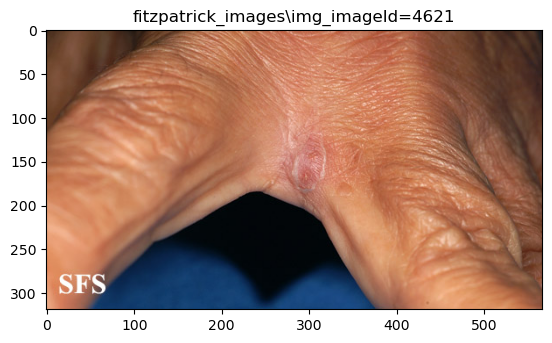

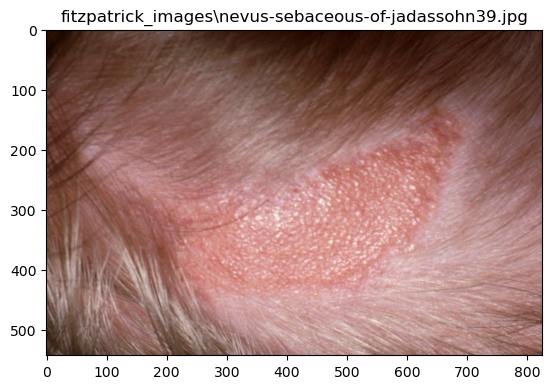

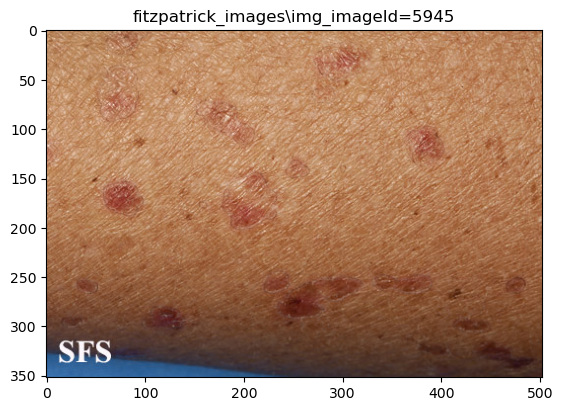

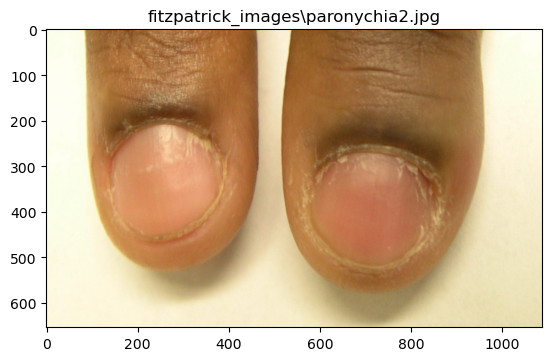

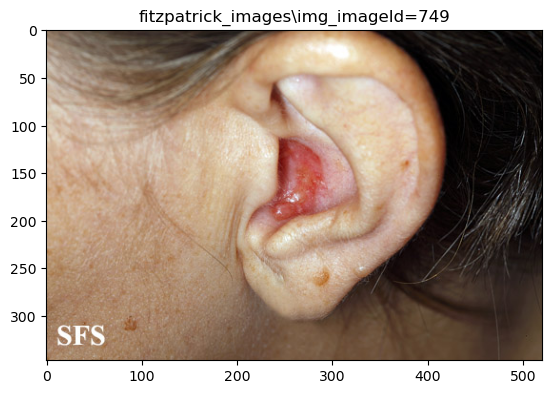

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Load the dataset
dataset = pd.read_csv('fitzpatrick17k_with_filenames.csv')

# Filter out records without an image
dataset = dataset.dropna(subset=['local_filename'])

# Display a sample of the images in the dataset
num_samples = 5
sample_indices = dataset.sample(num_samples).index

for i in sample_indices:
    # Load the image from disk using the local filename
    local_filename = dataset.iloc[i]['local_filename']
    pil_image = Image.open(local_filename)

    # Display the image
    plt.imshow(pil_image)
    plt.title(dataset.iloc[i]['local_filename'])
    plt.show()

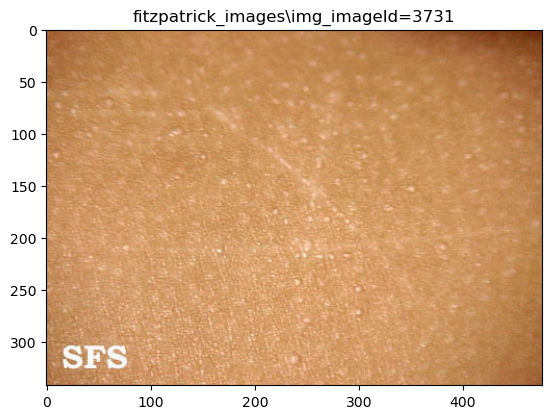

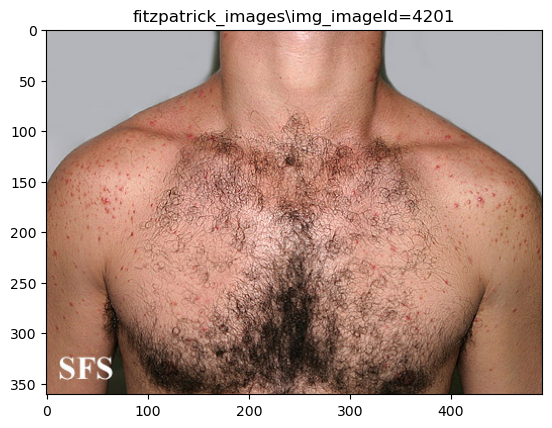

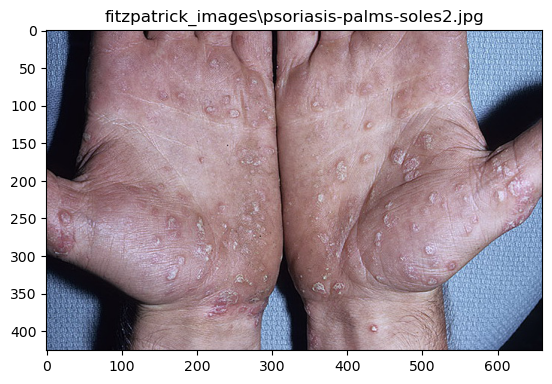

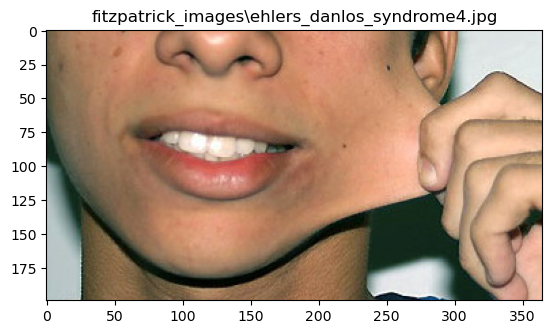

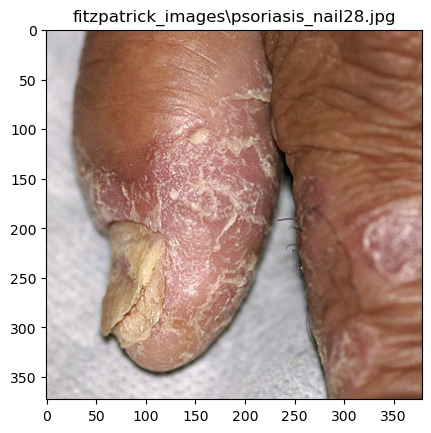

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Load the dataset
dataset = pd.read_csv('fitzpatrick17k_with_filenames.csv')

# Filter out records without an image
dataset = dataset.dropna(subset=['local_filename'])

# Display a sample of the images in the dataset
num_samples = 5
sample_indices = dataset.sample(num_samples).index

for i in sample_indices:
    # Load the image from disk using the local filename
    local_filename = dataset.iloc[i]['local_filename']
    pil_image = Image.open(local_filename)

    # Display the image
    plt.imshow(pil_image)
    plt.title(dataset.iloc[i]['local_filename'])
    plt.show()

In [22]:
import pandas as pd

# Load the dataset
dataset = pd.read_csv('fitzpatrick17k_with_filenames.csv')

# Get the indices of records with non-empty local_filename values
valid_indices = dataset[dataset['local_filename'].notna()].index

# Filter the dataset to only include valid records
valid_dataset = dataset.loc[valid_indices]

# Save the filtered dataset as a new CSV file
valid_dataset.to_csv('fitzpatrick17k_valid.csv', index=False)

# Print the number of removed records and the number of remaining records
num_removed = len(dataset) - len(valid_dataset)
print(f"Removed {num_removed} records with missing images.")
print(f"Remaining {len(valid_dataset)} records with valid images.")

Removed 59 records with missing images.
Remaining 16518 records with valid images.


In [23]:
valid_dataset.head()

,md5hash,fitzpatrick_scale,fitzpatrick_centaur,label,nine_partition_label,three_partition_label,qc,url,url_alphanum,local_filename
1,fa2911a9b13b6f8af79cb700937cc14f,1,1,photodermatoses,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicpphoto...,fitzpatrick_images\photosensitivity18.jpg
2,d2bac3c9e4499032ca8e9b07c7d3bc40,2,3,dermatofibroma,benign dermal,benign,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicdderma...,fitzpatrick_images\dermatofibroma71.jpg
3,0a94359e7eaacd7178e06b2823777789,1,1,psoriasis,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppsori...,fitzpatrick_images\psoriasis38.jpg
4,a39ec3b1f22c08a421fa20535e037bba,1,1,psoriasis,inflammatory,non-neoplastic,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpicppsori...,fitzpatrick_images\psoriasis-scalp20.jpg
5,45f7fe0e10214e32e890cad9d29d4811,6,5,kaposi sarcoma,malignant dermal,malignant,NaN,https://www.dermaamin.com/site/images/clinical...,httpwwwdermaamincomsiteimagesclinicalpickkapos...,fitzpatrick_images\kaposis-sarcoma4.jpg
